# 인위적인 데이터 집합

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn


x, y = mglearn.datasets.make_wave(n_samples=60)
print(x.shape)
print(y.shape)

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

w = lr.coef_
b = lr.intercept_
print("w : ", w) #계수
print("b : ", b) #절편

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

X_new = [[-1]]
prediction = lr.predict(X_new)
print("예측: {}".format(prediction))

(60, 1)
(60,)
w :  [0.39390555]
b :  -0.03180434302675973
훈련 세트 점수: 0.67
테스트 세트 점수: 0.66
예측: [-0.42570989]


# 선형 회귀

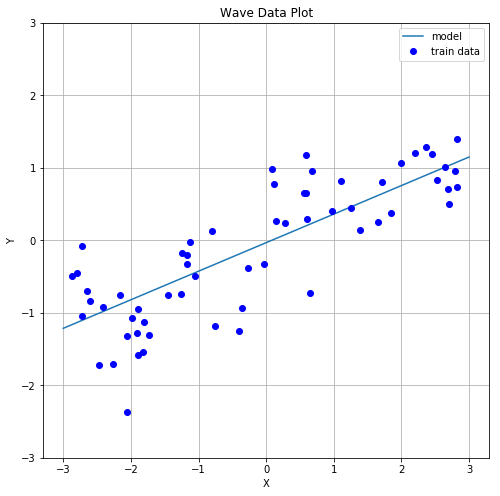

In [2]:
line = np.linspace(-3,3,100).reshape(-1,1)
plt.figure(figsize=(8,8))
plt.plot(line,lr.predict(line))
plt.plot(x,y,'o',c='blue')
plt.ylim(-3,3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Wave Data Plot")
plt.legend(["model","train data"],loc="best")
plt.grid()
plt.show()

# 보스톤 주택가격(1978) 다중선형회귀

## 데이터 불러오기

In [3]:
import sklearn.datasets as ds

names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

boston = ds.load_boston()
df = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=names)

display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
x = boston.data
y = boston.target

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(X_train.shape)
print(X_test.shape)

lr = LinearRegression().fit(X_train,y_train)

w = lr.coef_
b = lr.intercept_

print("w : ", w) #계수
print("w.shape : ",w.shape)
print("b : ", b) #절편

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))


(379, 13)
(127, 13)
w :  [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
w.shape :  (13,)
b :  36.933255457120175
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


# 상관도 높은 특징 추출

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


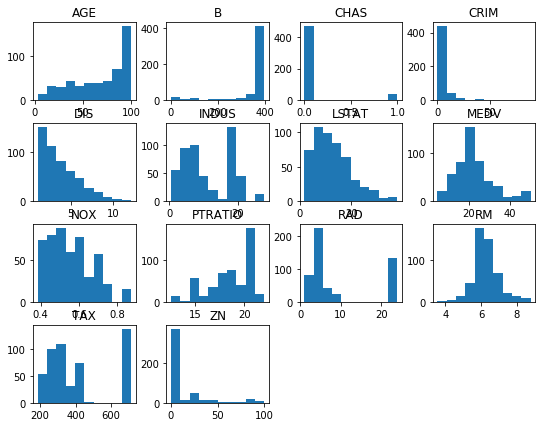

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

df.hist(bins=10,figsize=(9,7),grid=False)

corr = df.corr(method='pearson')
display(corr)

In [6]:
corrMEDV = corr['MEDV']
display(corrMEDV)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [7]:
sub = corrMEDV[corrMEDV.abs() > 0.45]
display(sub)

INDUS     -0.483725
RM         0.695360
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

# Ridge Regression

Ridge 회귀모형에서는 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가적인 제약 조건으로 한다.

In [8]:
ridge = Ridge().fit(X_train,y_train)

w = ridge.coef_
b = ridge.intercept_
print("================================")
print(" Ridge (alpha=1) ")
print("w : ",w)
print("b : ",b)

print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test,y_test)))

ridge10 = Ridge(alpha=10).fit(X_train,y_train)

w = ridge10.coef_
b = ridge10.intercept_

print("================================")
print(" Ridge (alpha=10) ")
print("w : ",w)
print("b : ",b)

print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test,y_test)))

ridge01 = Ridge(alpha=0.01).fit(X_train,y_train)

w = ridge01.coef_
b = ridge01.intercept_

print("================================")
print(" Ridge (alpha=0.1) ")
print("w : ",w)
print("b : ",b)

print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test,y_test)))



 Ridge (alpha=1) 
w :  [-0.11478591  0.04541838 -0.03540308  2.30329133 -8.12744537  3.80634143
 -0.01428219 -1.33693873  0.21674809 -0.01175498 -0.90393728  0.00881273
 -0.50742473]
b :  31.849731779350783
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.63
 Ridge (alpha=10) 
w :  [-0.11235372  0.04795757 -0.06100708  1.6862423  -1.53962161  3.5557743
 -0.0182528  -1.25334748  0.20721315 -0.01262432 -0.84731899  0.00908357
 -0.53553959]
b :  29.659431257531317
훈련 세트 점수 : 0.76
테스트 세트 점수 : 0.61
 Ridge (alpha=0.1) 
w :  [-1.17678415e-01  4.40425315e-02 -6.33380725e-03  2.39256711e+00
 -1.54474604e+01  3.77002334e+00 -7.17606565e-03 -1.43308493e+00
  2.39621628e-01 -1.13053164e-02 -9.83972338e-01  8.45145141e-03
 -4.99249019e-01]
b :  36.83367469262251
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.64


C:\Users\woals\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "buttom right". Falling back on "best"; valid locations are
	best
	lower left
	upper right
	center left
	lower right
	upper left
	upper center
	lower center
	right
	center
	center right

  % (loc, '\n\t'.join(self.codes)))


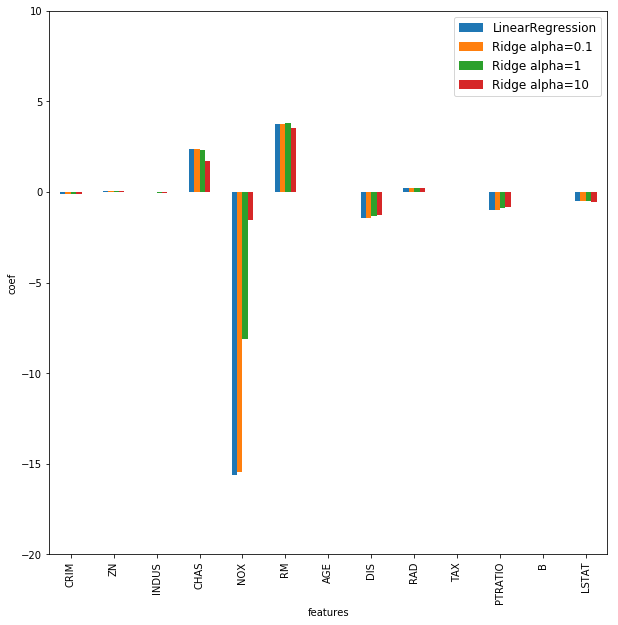

In [9]:
ind = boston.feature_names
dfe = pd.DataFrame({'Ridge alpha=10' : ridge10.coef_,
                   'Ridge alpha=1' : ridge.coef_,
                   'Ridge alpha=0.1' : ridge01.coef_,
                   'LinearRegression' : lr.coef_,},index = ind)

dfe.plot.bar(figsize=(10,10))
plt.xlabel("features")
plt.ylabel("coef")
plt.ylim(-20,10)
plt.legend(fontsize=12,loc='buttom right')

- - - 

# Anscombe's quartet 3 데이터 셋 가져오기

In [10]:
ans = pd.read_csv('anscombes.csv')
ans.drop(['id'],axis=1,inplace=True)
display(ans)


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


# correlation, mean, std, median 확인 및 plot

# Corr

In [11]:
#correlation
grouped = ans.groupby('dataset')
corr = grouped.corr(method='pearson')
display(corr)

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

# Mean

In [12]:
# mean
display(grouped.mean())

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


# Std

In [13]:
# std
display(grouped.std())

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


# Median

In [14]:
# std
display(grouped.median())

,x,y
dataset,,
I,9.0,7.58
II,9.0,8.14
III,9.0,7.11
IV,8.0,7.04


# Boxplot

I           AxesSubplot(0.1,0.559091;0.363636x0.340909)
II     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
III             AxesSubplot(0.1,0.15;0.363636x0.340909)
IV         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

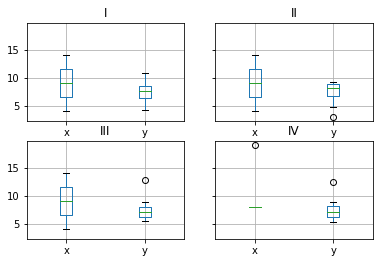

In [15]:
grouped.boxplot()

# Linear Regression

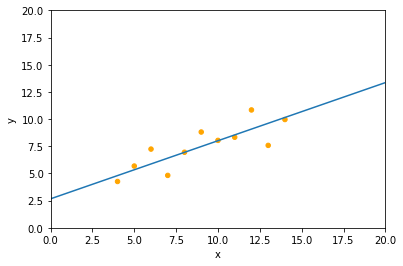

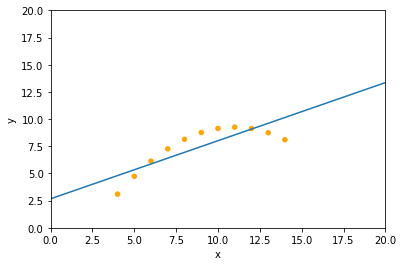

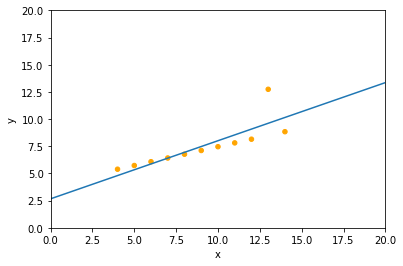

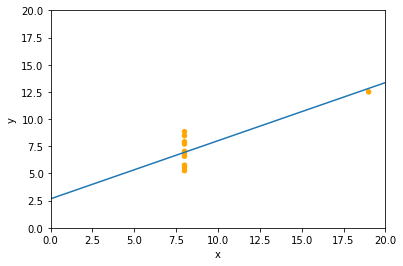

In [16]:
index = ['I','II','III','IV']

X_train,X_test,y_train,y_test = train_test_split(ans['x'].tolist(),ans['y'].tolist(),random_state=0)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

lr = LinearRegression().fit(X_train.reshape(X_train.size,1),y_train.reshape(y_train.size,1))

for i in index:
    grouped.get_group(i).plot.scatter(x = 'x',y = 'y',s = [20,20],c='orange',marker = 'o')
    line = np.linspace(0,20,100).reshape(-1,1)
    plt.xlim(0,20)
    plt.ylim(0,20)
    plt.plot(line,lr.predict(line))